In [2]:
import pystan



In [3]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] <- mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""




In [4]:
schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}



In [5]:
fit = pystan.stan(model_code=schools_code, data=schools_dat,
                  iter=1000, chains=4)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_95013624776d537c3cd7cd4d641c30e0 NOW.


In [6]:
print fit


Inference for Stan model: anon_model_95013624776d537c3cd7cd4d641c30e0.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

           mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
mu          8.5    0.23   5.19  -0.66   5.16   8.22  11.63  20.17  492.0   1.01
tau        6.75    0.27   5.84   0.28   2.59   5.37   9.39  21.14  480.0    1.0
eta[0]     0.35    0.02   0.88   -1.4  -0.24   0.37   0.94   1.99 1981.0    1.0
eta[1]    -0.04    0.02   0.88  -1.76  -0.63  -0.04   0.53   1.77 1959.0    1.0
eta[2]    -0.21    0.02   0.92  -2.01  -0.81   -0.2   0.41   1.61 2000.0    1.0
eta[3]    -0.07    0.02    0.9  -1.81  -0.69  -0.08   0.54   1.69 2000.0    1.0
eta[4]    -0.38    0.02   0.84  -2.04  -0.96  -0.38   0.18   1.31 1675.0    1.0
eta[5]    -0.21    0.02   0.85  -1.77  -0.79  -0.24   0.35   1.58 2000.0    1.0
eta[6]     0.29    0.02   0.92  -1.55  -0.29    0.3   0.89   2.03 1880.0   1.01
eta[7]     0.

In [8]:
fit2 = pystan.stan(fit=fit, data=schools_dat, iter=10000, chains=4)

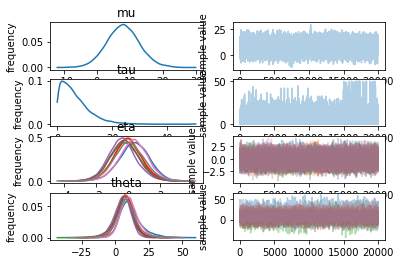

In [9]:
fit2.plot()